#### Going Deeper(CV)_DJ2


# 15. 사람의 몸짓을 읽어보자


- human pose estimation


## 15-2. body language, 몸으로 하는 대화


- 2D HPE 는 2D 이미지에서 (x, y) 2차원 좌표들을 찾아내고, 3D HPE 는 2D 이미지에서 (x, y, z) 3차원 좌표들을 찾아내는 기술

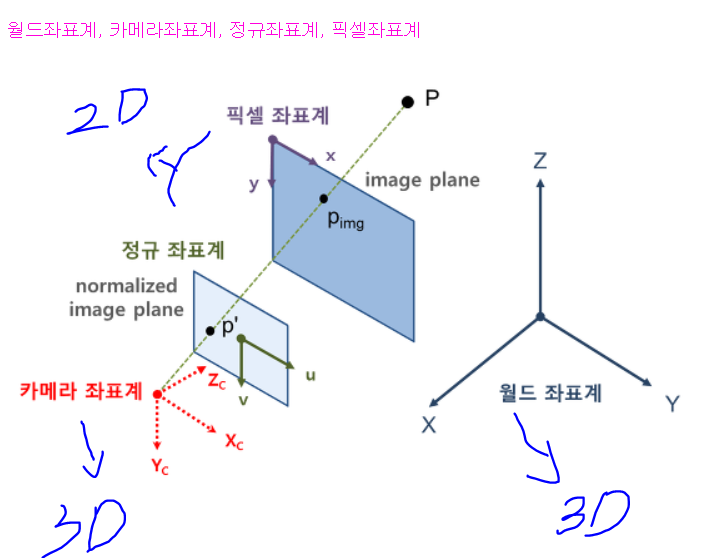

> 1.1 월드 좌표계 (World Coordinate System)
> - 우리가 사물(물체)의 위치를 표현할 때 기준으로 삼는 좌표계입니다.
> - $P = (X, Y, Z)$

> 1.2 카메라 좌표계 (Camera Coordinate System)
> - 월드 좌표계가 우리가 살고 있는 공간의 한 지점을 기준으로 한 좌표계라면 카메라 좌표계는 카메라를 기준으로 한 좌표계입니다. 카메라 좌표계는 아래 그림과 같이 카메라의 초점(렌즈의 중심)을 원점, 카메라의 정면 광학축 방향을 Z축, 카메라 아래쪽 방향을 Y축, 오른쪽 방향을 X축으로 잡습니다.
> - $P_c = (X_c,Y_c,Z_c)$

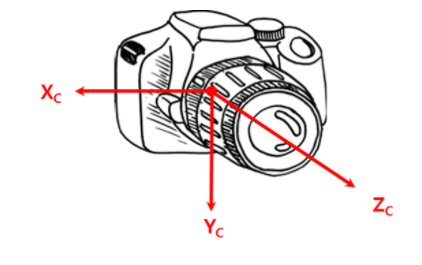

> 1.3 픽셀 좌표계 (Pixel Image Coordinate System)
> - 편의상 픽셀 좌표계라고 썼지만, 보통은 영상좌표계(Image Coordinate System)라고 불립니다. 픽셀 좌표계는 우리가 실제 눈으로 보는 영상에 대한 좌표계로서 위 <그림 1>과 같이 이미지의 왼쪽상단(left-top) 모서리를 원점, 오른쪽 방향을 x축 증가방향, 아래쪽 방향을 y축 증가방향으로 합니다. 그리고 픽셀 좌표계의 x축, y축에 의해 결정되는 평면을 이미지 평면 (image plane)이라 부릅니다.
    > - 3D 공간상의 한 점 P = (X,Y,Z)는 카메라의 초점 (또는 렌즈의 초점)을 지나서 이미지 평면의 한 점 pimg = (x, y)에 투영(projection) 됩니다. 알다시피 점 P와 점 pimg를 잇는 선(ray) 상에 있는 모든 3D 점들은 모두 pimg로 투영됩니다. 따라서 3D 점 P로부터 pimg는 유일하게 결정할 수 있지만, 반대로 영상 픽셀 pimg로부터 P를 구하는 것은 부가적인 정보 없이는 불가능합니다.
> - $P_{img}=(X, Y)$


> 1.4 정규 좌표계 (Normalized Image Coordinate System)
> - 정규 이미지 좌표계이지만 줄여서 정규 좌표계로 쓰겠습니다. 지금까지 나온 좌표계는 모두 매우 직관적인 좌표계이지만 정규 좌표계는 편의상 도입된 가상의 좌표계입니다.**카메라의 내부 파라미터(intrinsic parameter)의 영향을 제거한 이미지 좌표계**로 볼 수 있습니다. 또한 정규 좌표계는 좌표계의 단위를 없앤(정규화된) 좌표계이며 카메라 초점과의 거리가 1인 가상의 이미지 평면을 정의하는 좌표계입니다.
원래의 이미지 평면을 평행이동시켜서 카메라 초점과의 거리가 1인 지점으로 옮겨놓은 이미지 평면을 생각하면 됩니다.

> - 픽셀 좌표계와 구분하기 위해 u,v를 사용. $P' = (u,v)$
> - 카메라 내부 파라미터를 알면 픽셀 좌표와 정규 좌표 사이의 변환이 가능. $P_{img} = Kp'$
> - $ \begin{pmatrix}
  x \\
  y \\
  1
 \end{pmatrix} =
 \begin{pmatrix}
  f_{x} & 0 & c_{x} \\
  0 & f_{y} & c_{y} \\
  0 & 0 & 1
 \end{pmatrix}\begin{pmatrix}
  u \\
  v \\
  1
 \end{pmatrix}$
> - 여기서 fx, fy는 초점거리, cx, cy는 주점(principal point, 광학축과 영상평면이 만나는 픽셀좌표)이며, 가운데 3 x 3 행렬을 camera matrix라 부릅니다. 위 식을 정리하면 다음과 같은 식이 됩니다.
> - $x = f_xu+c_x$, $y = f_yv+c_y$
> - 역으로, 이미지 상의 픽셀(x,y)에 대응하는 정규좌표는 $u = (x-c_x)/f_x$, $v=(y-c_y)/f_y$
> - 우리가 동일한 장면을 동일한 위치와 동일한 각도에서 찍더라도 사용한 카메라에 따라서 또는 카메라 세팅에 따라서 서로 다른 영상을 얻게 됩니다. 그런데, 이러한 카메라 간의 차이는 어떤 일관된 기하학적인 해석을 하는데 있어서 불필요한 요소일 것입니다. 따라서, 이러한 요소를 제거한 정규화된 이미지 평면에서 공통된 기하학적 특성을 분석하고 이론을 수립하는 것이 보다 효과적이기 때문입니다.

> 영상 Geometry #7 Epipolar Geometry : https://darkpgmr.tistory.com/83?category=460965

> Q1. 2차원 이미지에서 3차원 이미지를 복원하는 일이 왜 어려울까요?
> - A. (직관적인 예시) 2D 영상에서는 큰 원통이 멀리 있는 것과 작은 원통이 가까이 있는 것을 구분할 수 없습니다. (이론적인 설명) 카메라 행렬에서 x y z real world 좌표가 이미지 u v 좌표계로 표현될 때 z 축(거리 축) 정보가 소실되기 때문입니다.


## 15-3. Pose 는 face landmark 랑 비슷해요

- face landmark 는 물리적으로 거의 고정되어 있는 (입이 얼굴보다 클 수 없는 걸 생각해 주세요😃) 반면, human pose 는 팔, 다리가 상대적으로 넓은 범위와 자유도를 갖는다는 것을 고려해야 합니다.

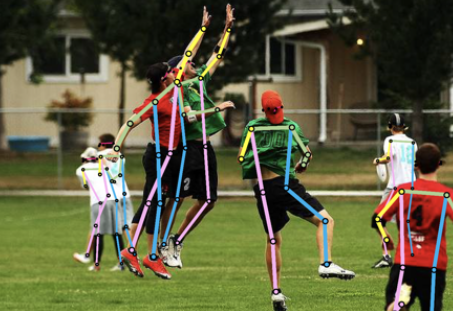

- 접근법은 두 가지로 나뉜다.

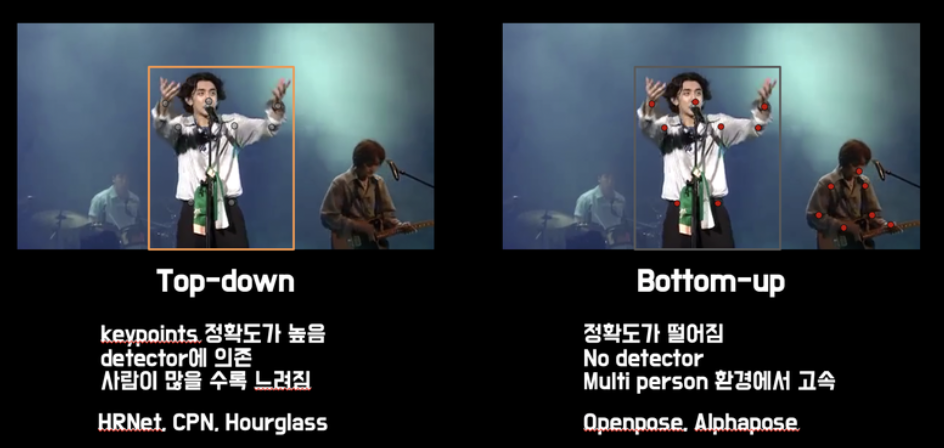

> 첫 번째 방법은 Top-down 방법입니다.
> - 모든 사람의 정확한 keypoint 를 찾기 위해 object detection 을 사용합니다.
crop 한 이미지 내에서 keypoint 를 찾아내는 방법으로 표현합니다.
detector가 선행되어야 하고 모든 사람마다 알고리즘을 적용해야 하기 때문에 사람이 많이 등장할 때는 느리다는 단점이 있습니다.

> 두 번째 방법은 Bottom-up 방법입니다.
> - detector가 없고 keypoint 를 먼저 검출합니다.
예를 들어 손목에 해당하는 모든 점들을 검출합니다.
한 사람에 해당하는 keypoint 를 clustering 합니다.
detector 가 없기 때문에 다수의 사람이 영상에 등장하더라도 속도 저하가 크지 않습니다. 반면 top down 방식에 비해 keypoint 검출 범위가 넓어 성능이 떨어진다는 단점이 있습니다.


## 15-4. human keypoint detection (1)

- 자유도가 높은 사람의 동작

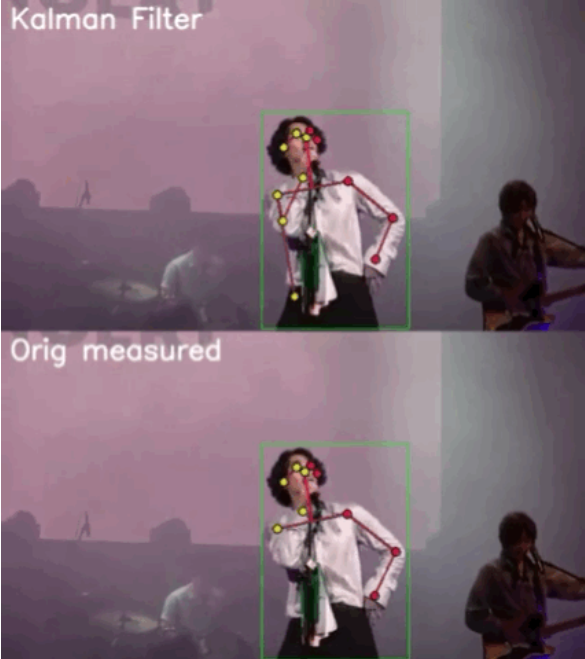

- 가장 기본이 되는 아이디어는 "인체는 변형 가능 부분으로 나누어져 있고각 부분끼리 연결성을 가지고 있다"

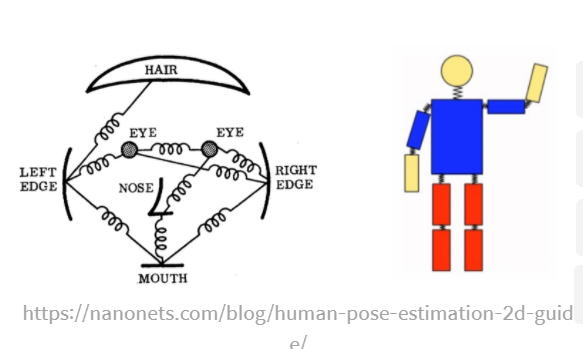

- Deformable part models 방법 : https://www.cs.cmu.edu/~deva/papers/pose_pami.pdf


****************************

### DeepPose

- 딥러닝 기반 Keypoint localization 모델 : https://arxiv.org/pdf/1312.4659.pdf






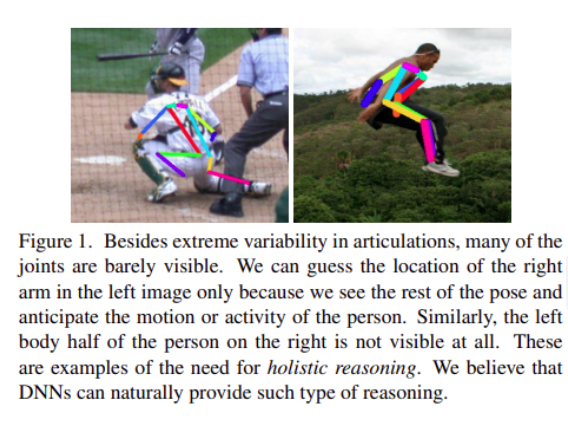

- 동작의 다양성, invisible joint의 문제를 언급하며 딥러닝 기반 추론 방법이 해결책이 될 수 있다.

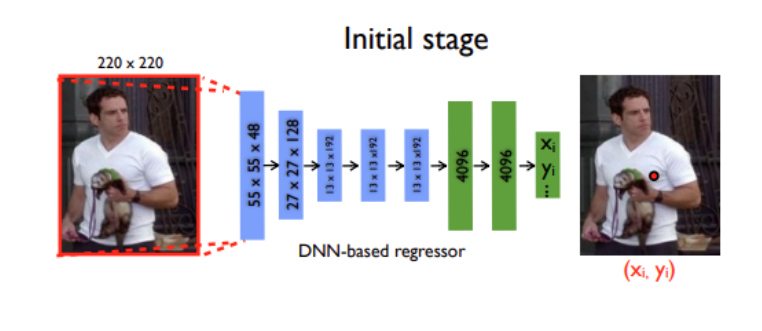

- human detection 을 통한 crop 된 사람 이미지를 이용해서 딥러닝 모델에 입력하고 (x,y) 좌표를 출력하도록 만듭니다.

> position regression 인 DeepPose는 어떤 loss 함수를 썼을까요?
> - L2 Loss

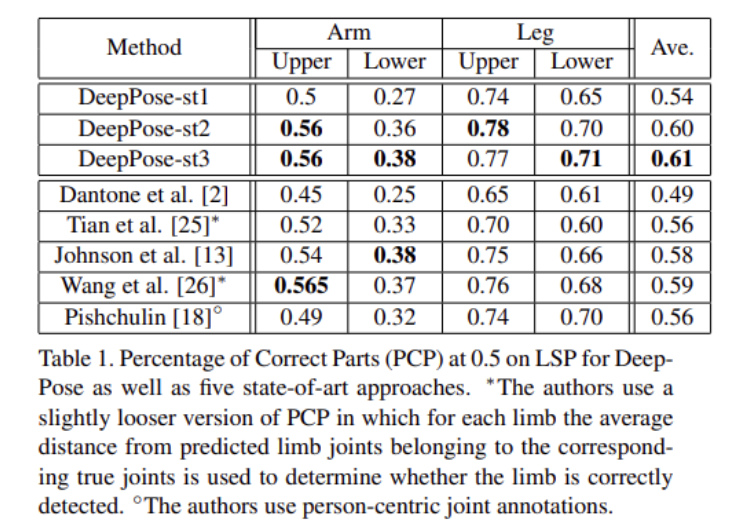

- DeepPose 의 기여는 SOTA에 가까운 성능을 내면서도 딥러닝을 적용한 첫 번째 사례라고 할 수 있겠습니다.

***********************

### Efficient Object Localization Using Convolutional Network

- Tompson 이 제안한 Efficient object localization 방법

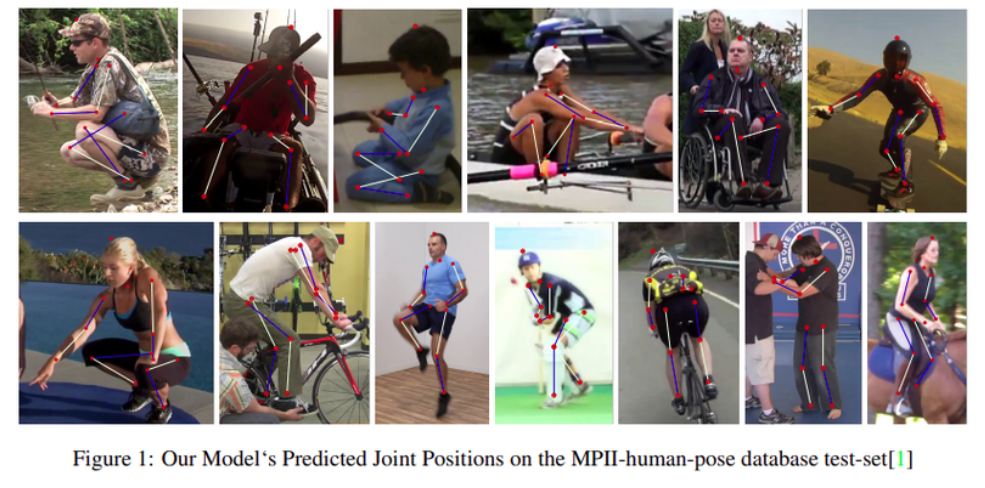

- Keypoint의 위치를 직접 예측하기보다 keypoint가 존재할 확률 분포를 학습하게 하자.

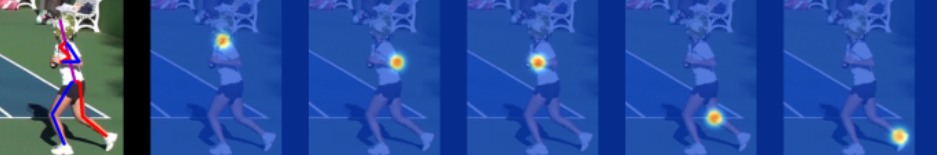

https://nanonets.com/blog/human-pose-estimation-2d-guide/

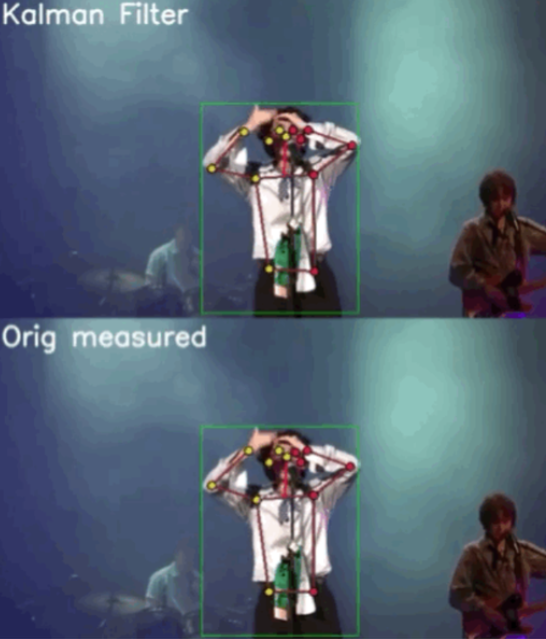

- Kalman filter라고 적힌 동영상에 비해 Orig measured는 점이 떨리고 있다.
- 사진마다 수 픽셀씩 차이가 생김.
    - 눈을 찍고 싶다면 눈을 중심으로 "어떤 분포"의 에러가 더해져서 저장됨.

- 자연상태에서 일어나는 확률 분포는 가우시안 분포일 가능성이 큽니다. Tompson 은 이런 점에 착안하여 label 을 (x,y) 좌표에서 (x,y) 를 중심으로 하는 heatmap 으로 변환했습니다. 딥러닝 모델은 이 heatmap 을 학습하게 되는 것이죠. **"keypoint 가 존재할 확률" 을 학습하게 된 이후로 성능이 비약적으로 향상**되는 모습을 볼 수 있습니다.



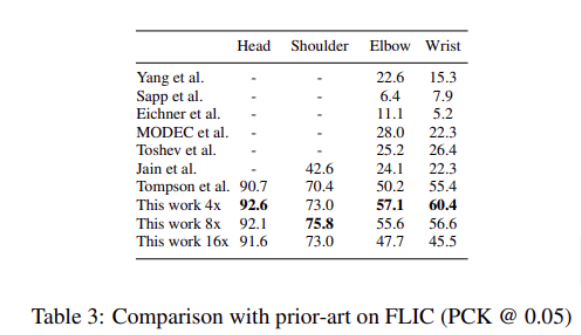

- Toshev가 제안한 DeepPose 에 비해 무려 2배가 넘는 수치를 볼 수 있습니다. 머리의 경우 0.9 가 넘는 높은 성능을 드디어 가지게 됐습니다.

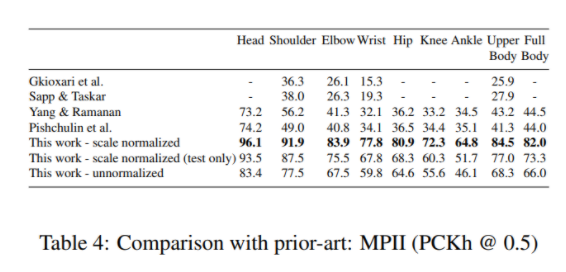

- 기존 FLIC 데이터가 머리, 어깨, 팔꿈치, 손목 수준의 적은 개수의 keypoint를 가지고 있었지만 MPII는 몸의 각 관절 부위 16개의 keypoint를 갖습니다. 기존 논문 (Gkioxari, Sapp) 들이 일부 데이터가 없는 이유입니다.

- 논문 : https://arxiv.org/pdf/1411.4280.pdf

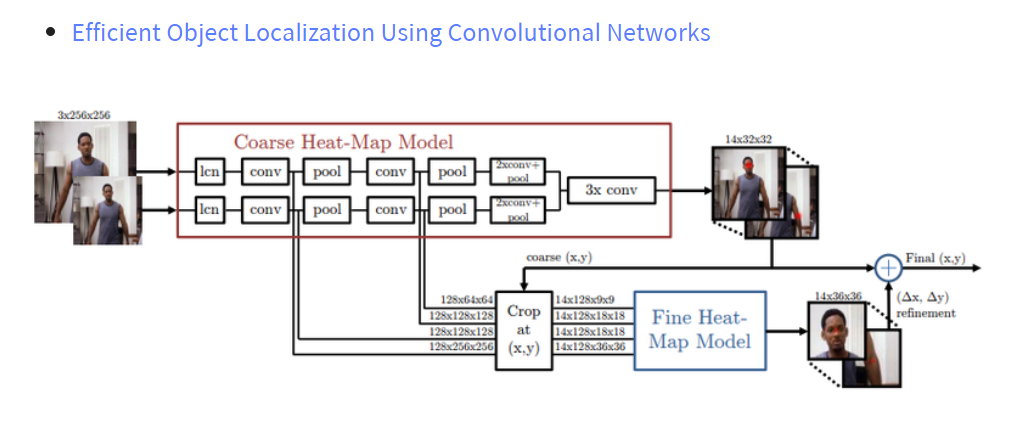

> Tompson이 제안한 모델은 Coarse model 과 fine model 로 나누어집니다. 두 모델 간에 어떤 관계가 있을까요?
> - coarse model 에서 32x32 heatmap 을 대략적으로 추출한 후 multi resolution 입력을 coarse heatmap 기준으로 crop 한 뒤 fine model 에서 refinement 를 수행합니다.

> Tompson 이 제안한 모델에서 weight sharing 이 적용된 부분을 설명해 봅시다. 왜 그렇게 만들었을까요?
> - coarse model 과 fine model 이 같은 모델이며 weight 를 공유합니다. 목적이 같기 때문에 빠른 학습이 가능하고 메모리, 저장공간을 효율적으로 사용할 수 있습니다.

## 15-5. human keypoint detection (2)

### Convolutional Pose Machines

***************************************

Convolutional Pose Machines : https://arxiv.org/pdf/1602.00134.pdf

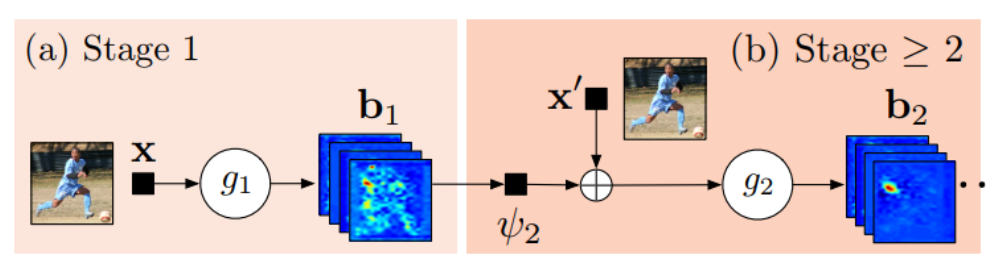

- CPM 은 end-to-end 로 학습할 수 있는 모델을 제안
- Stage 1 은 image feature 를 계산하는 역할을 하고 stage 2는 keypoint 를 예측하는 역할을 합니다. g1과 g2 모두 heatmap 을 출력하게 만들어서 재사용이 가능한 부분은 weight sharing 할 수 있도록 세부 모델을 설계.

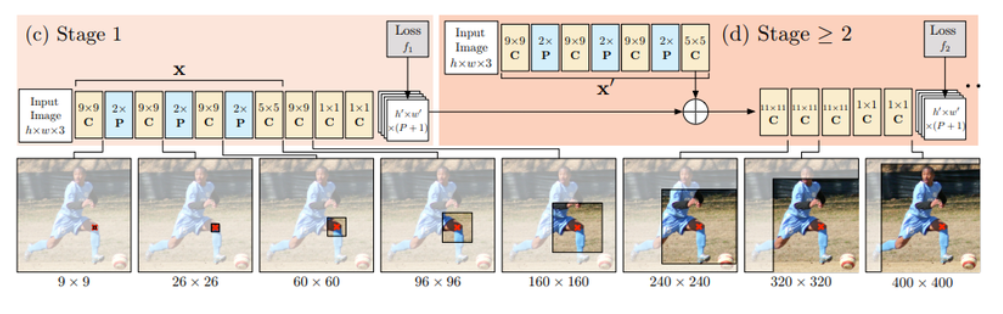

- Stage ≥ 2 에서 볼 수 있듯이 stage 2 이상부터는 반복적으로 사용할 수 있습니다. 보통은 3개의 스테이지를 사용한다고 합니다. stage 1 구조는 고정이고 stage 2 부터는 stage 2 구조를 반복해서 추론합니다. stage 2 부터는 입력이 heatmap(image feature)이 되기 때문에 stage 단계를 거칠수록 keypoint가 refinement 되는 효과를 볼 수 있습니다.

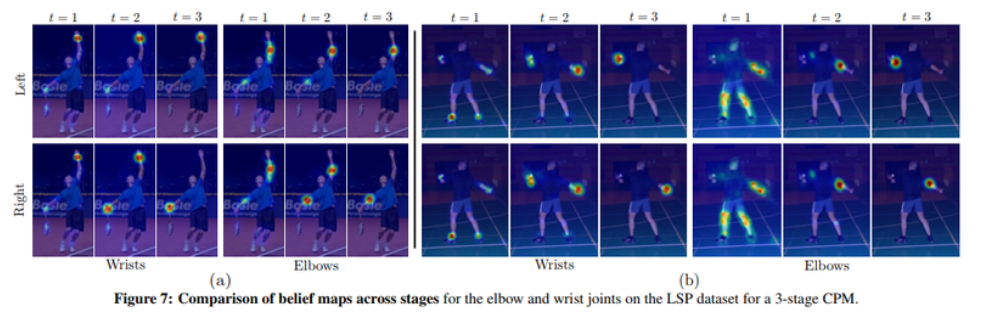

- Multi-stage 방법을 사용하기 때문에 end-to-end 로 학습이 가능하더라도 그대로 학습하는 경우는 높은 성능을 달성하기 어렵습니다. 따라서 stage 단위로 pretraining 을 한 후 다시 하나의 모델로 합쳐서 학습
    - receptive field 를 넓게 만드는 multi stage refinement 방법이 성능 향상에 크게 기여

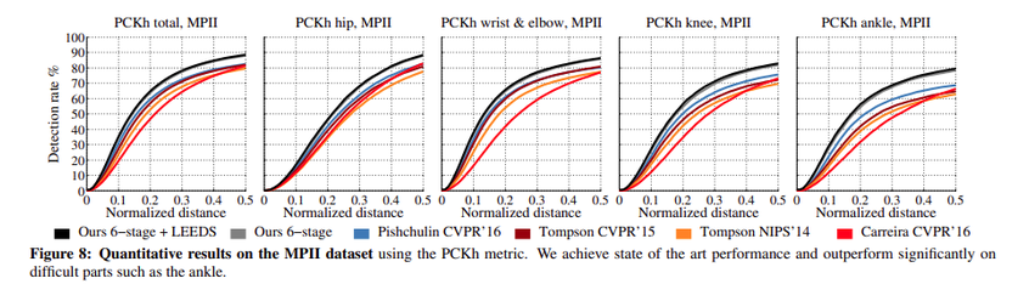

- 주황색 실선이 Tompson 알고리즘입니다. CPM 에서 제안한 검정색, 회색 실선이 detection rate에서 유의미한 차이

******************

### Stacked Hourglass Network

- Stacked Hourglass Networks for Human Pose Estimation 논문 : https://arxiv.org/pdf/1603.06937.pdf


> Hourglass
> - Stacked Hourglass Network 의 기본 구조는 모래시계 같은 모양으로 만들어져 있습니다. Conv layer 와 pooling 으로 이미지(또는 feature) 를 인코딩 하고 upsampling layer 를 통해 feature map 의 크기를 키우는 방향으로 decoding 합니다. feature map 크기가 작아졌다 커지는 구조여서 hourglass 라고 표현합니다.

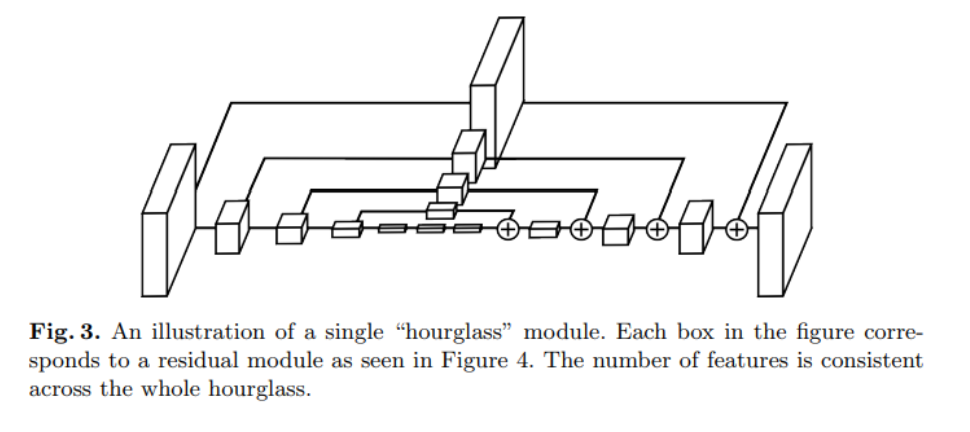

## 차이점

### 1) feature map upsampling
### 2)residual connection

- pooling으로 image의 global feature를 찾고 upsampling으로 local feature를 고려하는 아이디어가 hourglass의 핵심 novelty
    - Hourglass는 이 간단한 구조를 여러 층으로 쌓아올려서 (stacked) human pose estimation의 성능을 향상

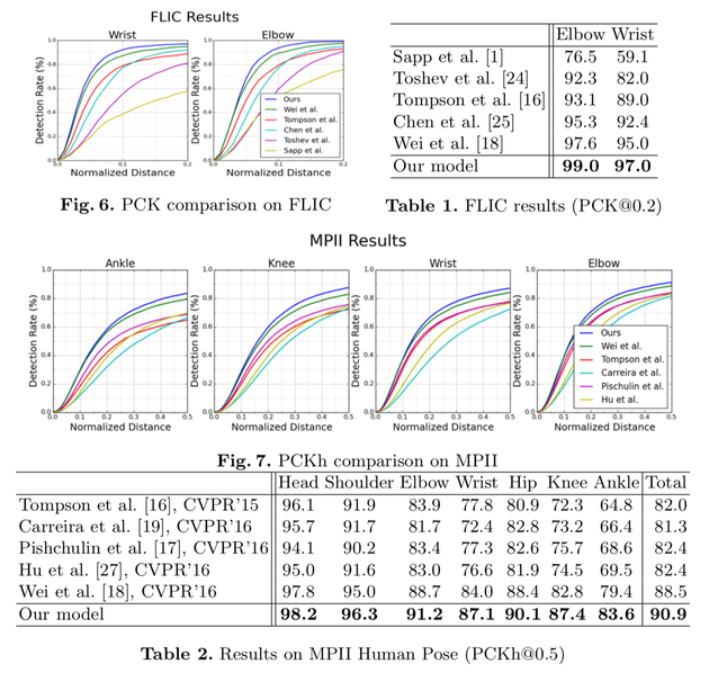

***************************
### SimpleBaseline


SimpleBaseline : https://arxiv.org/pdf/1804.06208.pdf

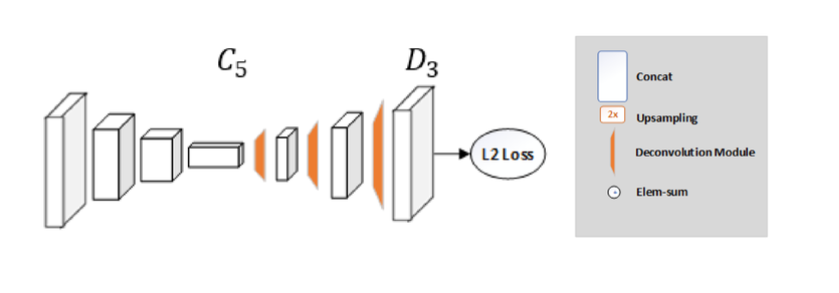

- SimpleBaseline의 저자는 정말 아주 간단한 encoder-decoder 구조를 설계

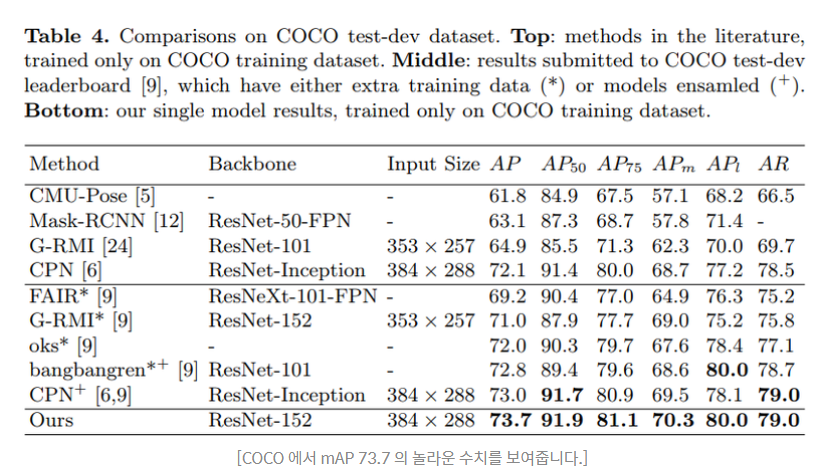

- 이 구조로 무려 '73.7%' 의 AP 를 COCO 에서 달성합니다. 직전 연도(2017년) 의 72.1% 결과를 뛰어넘는 수치입니다. 인턴 성과로 ECCV'18 에 출판되는 위엄을 보여주게 됩니다.

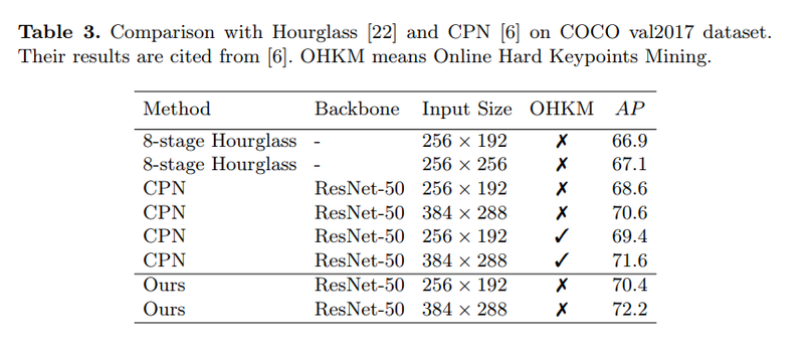

- resnet 50 만 사용한 간단한 구조가 hourglass 와 같은 SOTA(state-of-the-art) 를 이겼다.
- CPN 은 이전에 소개한 Convolutional Pose Machine 이 아닌 Cascaded Pyramid Network 라는 모델입니다. 자세히 소개 드리지는 않지만 skip connection 이 stage 사이에 연결되어 있다는 정도로 이해하고 넘어가시면 좋을 것 같습니다.

*****************************

### Deep High-Resolution Network (HRNet)

HRNet : https://arxiv.org/pdf/1902.09212.pdf


- Stacked hourglass, Casecaded pyramid network 등은 multi-stage 구조로 이루어져 있어서 학습 & 추론 속도가 느리다는 큰 단점이 있습니다. (대신 하이퍼파라미터를 최적화할 경우 1-stage 방법보다 성능이 좋습니다.)
- 반면 Simplebaseline 과 HRNet은 간단함을 추구하는 만큼 1-stage 를 고수합니다. 덕분에 구조도 간결해지고 사용하기도 쉽습니다.

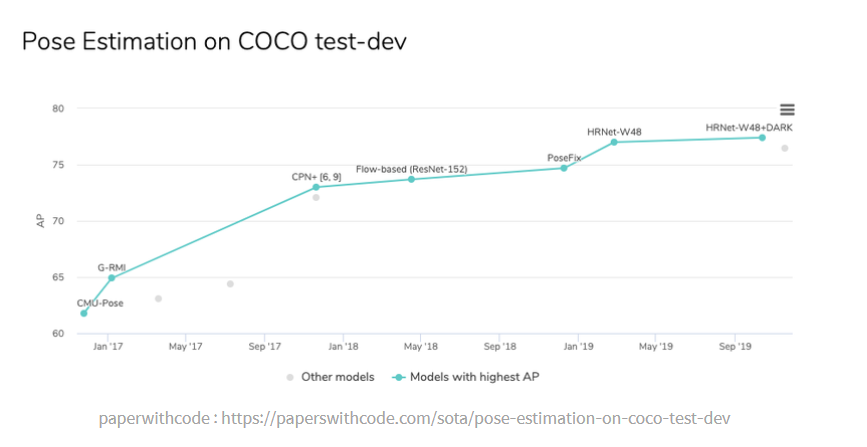

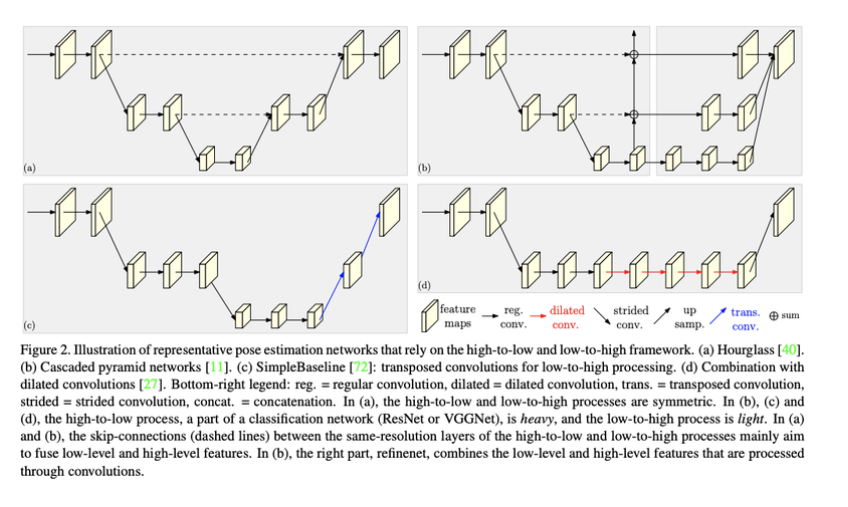

> - (a) : Hourglass
> - (b) : CPN(cascaded pyramid networks)
> - (c) : SimpleBaseline - transposed conv
>-(d) : SimpleBaseline - dilated conv



> 위 그림에서 Simplebaseline 이 다른 알고리즘들에 비해 성능이 떨어지지 않지만 구조를 보면 공통점과 차이점을 관찰할 수 있습니다. 어떤 공통점과 차이점이 있을까요?
>-공통점 : high resolution → low resolution 인 encoder 와 low → high 인 decoder 구조로 이루어진 점
차이점 : Hourglass 는 encoder 와 decoder 의 비율이 거의 비슷함(대칭적임). 반면 Simplebaseline 은 encoder 가 무겁고 (resnet50 등 backbone 사용) decoder 는 가벼운 모델을 사용함. (a), (b) 는 skip connection 이 있지만 (c) 는 skip connection 이 없다.


>  차이점에 조금 더 집중해보면 기존 모델들은 skip connection 을 적극적으로 사용했습니다. 왜 사용했을까요? Simplebaseline 도 사용해야하지 않을까요? 
>-pooling(strided conv) 할 때 소실되는 정보를 high level layer에서 사용해서 detail한 정보를 학습하기 위해 사용합니다. 당연히 사용할 때 성능이 더 좋을 것 같습니다.

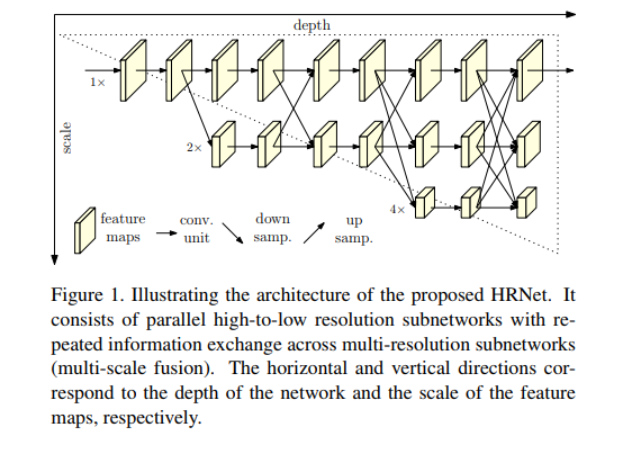

> high → low → high 의 구조에서 high resolution 정보(representation)을 유지할 수 있는 모델을 어떻게 만들 수 있을까?
>- down sample layer를 만들고 작아진 layer feautre 정보를 다시 up sampling해서 원본 해상도 크기에 적용하는 모델을 제안했습니다. 다소 복잡해 보이지만 1-stage로 동작하기 때문에 전체 flow를 보면 엄청 간단합니다. 우리가 앞에서 다뤘던 CPM이나 Hourglass는 중간 단계에서의 heatmap supervision이 학습과정에 꼭 필요했는데 HRNet 은 필요가 없습니다!!
>- 구현도 Simplebaseline의 backbone인 Resnet을 HRNet으로 교체만 해주면 되기 때문에 사용하기도 굉장히 편리합니다.HRNet 또한 이전 알고리즘 들과 마찬가지로 heatmap을 regression하는 방식으로 학습하고 MSE loss를 이용합니다. (특히 Simplebaseline 과 거의 유사합니다.)

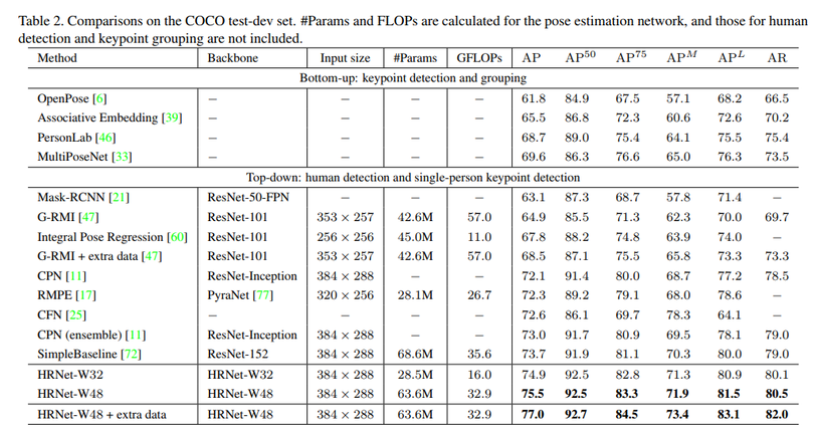

- AP 성능을 보면 HRNet 이 4% 에 가까운 비약적인 성능 향상
- https://github.com/leoxiaobin/deep-high-resolution-net.pytorch

## 15-6. 코드로 이해하는 pose estimation


***********************
### SimpleBaseline 구조



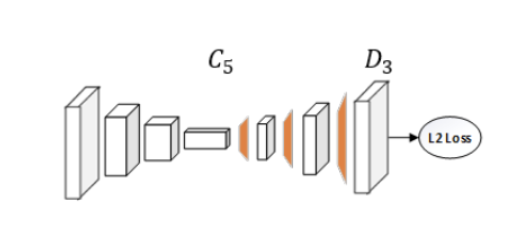

- encoder : conv layers
- decoder : deconv module + upsampling

- conv model로 resnet backbone을 사용한다.
- deconv module은 어떤 레이어로 이루어져 있나요? 
    - deconv-bn-relu 이 단계가 3개로 이루어져 있습니다. deconv 는 256 filter size, 4x4 kernel, stride 2 로 2배씩 feature map이 커집니다.
- 마지막 출력 레이어는 어떤 레이어로 구성되나요?    
    - k 개의 1x1 conv layer로 구성됩니다.
    
    *********************
### PyTorch code 읽어보기
https://github.com/Microsoft/human-pose-estimation.pytorch


SimpleBaseline PyTorch : https://github.com/microsoft/human-pose-estimation.pytorch/blob/master/lib/models/pose_resnet.py

 - nn. 표현이 많이 등장합니다. torch.nn 으로 keras.layers 와 같이 딥러닝 모델 구성에 필요한 도구들이 정의되어 있습니다.


human-pose-estimation.pytorch : https://github.com/microsoft/human-pose-estimation.pytorch/blob/master/lib/models/pose_resnet.py#L29

- 29번째 줄에서는 BasicBlock 이라는 클래스가 보이네요. keras.models 로 model 을 선언하는 것과 비슷합니다.

- 참고로 pytorch model 에서는 사용된 layer 를 forward 함수를 통해 computational graph 를 그려줍니다.

In [1]:
       # residual = x

        #out = self.conv1(x)
        #out = self.bn1(out)
        #out = self.relu(out)

        #out = self.conv2(out)
        #out = self.bn2(out)

        #if self.downsample is not None:
         #   residual = self.downsample(x)

       # out += residual
       # out = self.relu(out)
        
        # residual block을 사용.

Pose 메인 model 을 살펴보니 4개의 residual block 을 이용합니다. 완전 resnet 과 동일

In [2]:
#def forward(self, x):
 #       x = self.conv1(x)
  #      x = self.bn1(x)
   #     x = self.relu(x)
    #    x = self.maxpool(x)

     #   x = self.layer1(x)
      #  x = self.layer2(x)
       # x = self.layer3(x)
        #x = self.layer4(x)

       # x = self.deconv_layers(x)
       # x = self.final_layer(x)

        #return x

resnet 을 통과한 후 deconv_layers 와 final_layer를 차례로 통과

In [3]:
#        layers.append(
 #               nn.ConvTranspose2d(
  #                  in_channels=self.inplanes,
   #                 out_channels=planes,
    #                kernel_size=kernel,
     #               stride=2,
      #              padding=padding,
       #             output_padding=output_padding,
        #            bias=self.deconv_with_bias))
         #   layers.append(nn.BatchNorm2d(planes, momentum=BN_MOMENTUM))
          #  layers.append(nn.ReLU(inplace=True))


transpose conv 와 bn, relu 로 이루어져 있는 것을 확인

- EXTRA 가 자주 등장하는 것을 볼 때, 어떤 configuration 파일이 있을 것으로 짐작해 볼 수 있겠네요. repo 내에서 검색해 보면 파라미터 관련 정보를 담고 있는 아래 파일을 찾을 수 있습니다.

In [4]:
#NUM_DECONV_LAYERS: 3
 #   NUM_DECONV_FILTERS:
  #  - 256
   # - 256
   # - 256
   # NUM_DECONV_KERNELS:
    #- 4
    #- 4
    #- 4

> 192x256 의 이미지가 입력될 때 출력의 크기는 얼마인가요?
>- resnet 출력이 6x8 이 나오고 3개의 deconv layer 를 통과하므로 48x64 가 출력됩니다.

In [5]:
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

resnet = tf.keras.applications.resnet.ResNet50(include_top=False, weights='imagenet')

In [6]:
upconv1 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn1 = tf.keras.layers.BatchNormalization()
relu1 = tf.keras.layers.ReLU()
upconv2 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn2 = tf.keras.layers.BatchNormalization()
relu2 = tf.keras.layers.ReLU()
upconv3 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same')
bn3 = tf.keras.layers.BatchNormalization()
relu3 = tf.keras.layers.ReLU()

In [7]:
def _make_deconv_layer(num_deconv_layers):
    seq_model = tf.keras.models.Sequential()
    for i in range(num_deconv_layers):
        seq_model.add(tf.keras.layers.Conv2DTranspose(256, kernel_size=(4,4), strides=(2,2), padding='same'))
        seq_model.add(tf.keras.layers.BatchNormalization())
        seq_model.add(tf.keras.layers.ReLU())
    return seq_model

upconv = _make_deconv_layer(3)

In [8]:
final_layer = tf.keras.layers.Conv2D(17, kernel_size=(1,1), padding='same')

In [9]:
inputs = keras.Input(shape=(256, 192, 3))
x = resnet(inputs)
x = upconv(x)
out = final_layer(x)
model = keras.Model(inputs, out)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 192, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
sequential (Sequential)      (None, 64, 48, 256)       10489600  
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 48, 17)        4369      
Total params: 34,081,681
Trainable params: 34,027,025
Non-trainable params: 54,656
_________________________________________________________________


In [10]:
np_input = np.zeros((1,256,192,3), dtype=np.float32)
tf_input = tf.convert_to_tensor(np_input, dtype=tf.float32)
print('input shape')
print (tf_input.shape)
print('\n')

tf_output = model(tf_input)
print('output shape')
print (tf_output.shape)
print (tf_output[0,:10,:10,:10])

input shape
(1, 256, 192, 3)


output shape
(1, 64, 48, 17)
tf.Tensor(
[[[ 1.03243040e-02  1.09852052e-04  7.79008633e-03 -1.07155219e-02
    6.51789131e-03 -7.94143975e-03  2.30842410e-03 -4.43066005e-03
    8.02382641e-03  6.09086687e-03]
  [ 1.51114827e-02  5.74551523e-03  1.27897831e-02  1.45525374e-02
    6.52540755e-03 -6.33207755e-03  8.01613089e-03  7.25892466e-03
   -1.02896960e-02  6.99186977e-03]
  [ 1.90361459e-02  4.69838688e-03  1.02877114e-02 -1.27698705e-02
    1.27450842e-02  2.46043596e-03  1.17757916e-02 -9.80793126e-03
   -7.28248106e-03  7.85698928e-03]
  [ 1.34762498e-02  1.23763620e-03  9.99328215e-03 -5.93641493e-03
   -3.72638833e-03 -1.59889199e-02 -9.52547882e-03  2.63405358e-03
   -3.86614166e-03  2.49936655e-02]
  [ 2.07956024e-02 -8.17775447e-03  1.21626689e-03 -3.87824629e-03
    1.16153210e-02 -9.60381003e-04  9.62660764e-04 -2.64076572e-02
    2.12212070e-03  5.63912420e-03]
  [ 1.80848334e-02  3.76324519e-03 -1.32873440e-02 -7.83549529e-03
    1.933271